In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import dataframe_image as dfi


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [55]:
model = pd.read_csv("model.csv", low_memory = False)

In [56]:
# THE NUMBER OF FEATURES
len(model.columns)

208

In [57]:
# DROPPING NULLS
# model.isnull().sum().sort_values(ascending = False)
model = model.dropna()

In [58]:
# TOTAL ROWS
len(model)

586650

In [59]:
# HEATMAP
#plt.figure(figsize=(12,10))
#sns.heatmap(model.corr())

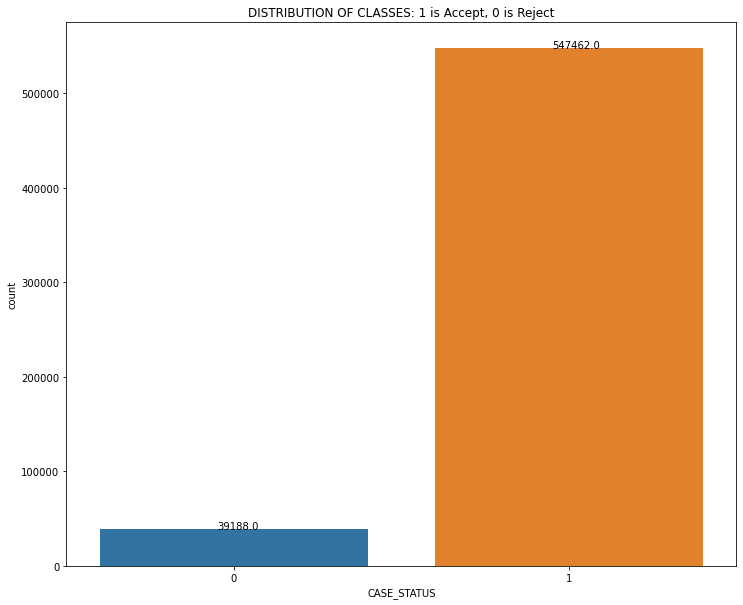

In [60]:
# DISTRIBUTION OF CLASSES
plt.figure(figsize=(12,10))
plt.title("DISTRIBUTION OF CLASSES: 1 is Accept, 0 is Reject")
ax = sns.countplot(x = model["CASE_STATUS"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01))

<AxesSubplot:xlabel='WO_A', ylabel='Count'>

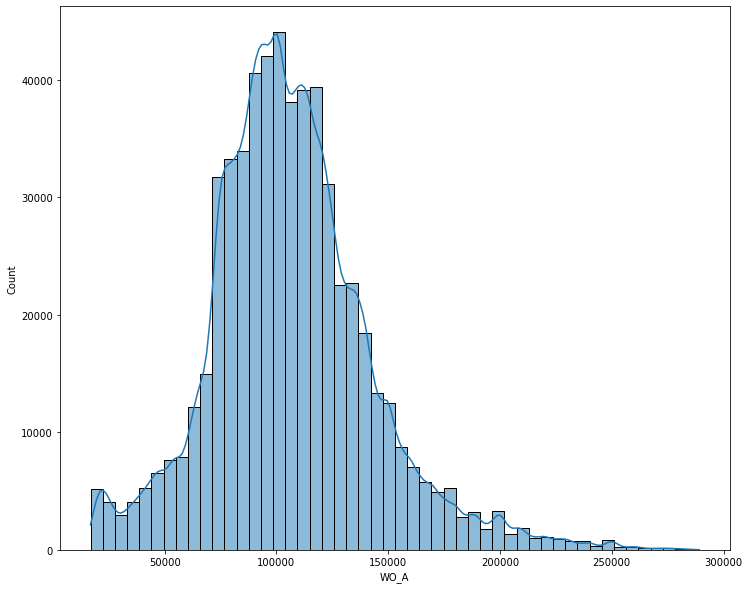

In [61]:
# DISTRIBUTION OF WAGE OFFER 
plt.figure(figsize=(12,10))
sns.histplot(x = "WO_A", data = model, kde= True, bins = 50)

In [42]:
##### DEEP LEARNING Regression ####

In [43]:
# Preprocessing Data
model = model.drop(['CASE_STATUS',
'DAYS_TO_DECIDE',
'YEAR',
'WO-PW',
'DISC_UNIT',
'YRSPOSTGRAD',"YR","MTH","HR","WK","YOUNG","OLD"], axis = 1)

X = model.drop("WO_A",axis = 1)
y = model["WO_A"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating Model: dm1
dm1 = Sequential()

dm1.add(Dense(195,activation = "relu"))
dm1.add(Dropout(.2))
dm1.add(Dense(98,activation = "relu"))
dm1.add(Dropout(.2))
dm1.add(Dense(1))

dm1.compile(optimizer = "adam", loss = "mse", )
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 10)


# Training DM1
dm1.fit(x = X_train, y = y_train, epochs = 500,validation_data = (X_test,y_test), callbacks = [early_stop], batch_size = 32)

Epoch 1/500
13750/13750 [==============================] - 37s 3ms/step - loss: 960714176.0000 - val_loss: 537762048.0000
Epoch 2/500
13750/13750 [==============================] - 36s 3ms/step - loss: 586402560.0000 - val_loss: 501414976.0000
Epoch 3/500
13750/13750 [==============================] - 36s 3ms/step - loss: 556451008.0000 - val_loss: 479278304.0000
Epoch 4/500
13750/13750 [==============================] - 36s 3ms/step - loss: 534424960.0000 - val_loss: 454293472.0000
Epoch 5/500
13750/13750 [==============================] - 37s 3ms/step - loss: 514112512.0000 - val_loss: 432401952.0000
Epoch 6/500
13750/13750 [==============================] - 38s 3ms/step - loss: 495748672.0000 - val_loss: 412547744.0000
Epoch 7/500
13750/13750 [==============================] - 35s 3ms/step - loss: 480592512.0000 - val_loss: 403201056.0000
Epoch 8/500
13750/13750 [==============================] - 34s 2ms/step - loss: 464239200.0000 - val_loss: 374857408.0000
Epoch 9/500
13750/13750 

13750/13750 [==============================] - 33s 2ms/step - loss: 486235200.0000 - val_loss: 222179984.0000
Epoch 68/500
13750/13750 [==============================] - 33s 2ms/step - loss: 608547648.0000 - val_loss: 221732512.0000
Epoch 69/500
13750/13750 [==============================] - 33s 2ms/step - loss: 596899072.0000 - val_loss: 222612944.0000
Epoch 70/500
13750/13750 [==============================] - 33s 2ms/step - loss: 496671296.0000 - val_loss: 220632848.0000
Epoch 71/500
13750/13750 [==============================] - 33s 2ms/step - loss: 563417344.0000 - val_loss: 220572560.0000
Epoch 72/500
13750/13750 [==============================] - 33s 2ms/step - loss: 551528960.0000 - val_loss: 219412944.0000
Epoch 73/500
13750/13750 [==============================] - 33s 2ms/step - loss: 569744768.0000 - val_loss: 220727536.0000
Epoch 74/500
13750/13750 [==============================] - 33s 2ms/step - loss: 497291680.0000 - val_loss: 233346800.0000
Epoch 75/500
13750/13750 [===

<AxesSubplot:>

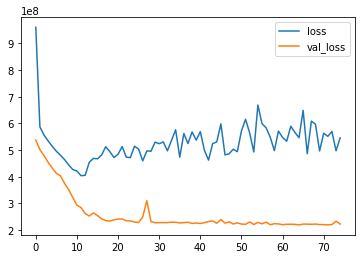

In [44]:
# MODEL OVERFIT? DM1
pd.DataFrame(dm1.history.history).plot()

In [45]:
# MODEL EVALUATION DM1
pdm1 = dm1.predict(X_test)

print("MSE:",metrics.mean_squared_error (y_test,pdm1))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,pdm1)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,pdm1))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, pdm1))
print("RMAE:", metrics.mean_absolute_error (y_test, pdm1)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,pdm1))

4584/4584 [==============================] - 5s 1ms/step
MSE: 222365454.72447065
RMSE: 14911.923240295688
RRMSE: 0.13997918646528895
MAE: 8909.362369874261
RMAE: 0.08363275993061836
EV: 0.832296086292727


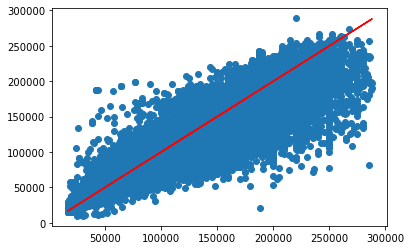

In [46]:
# PLOT THE PREDICTIONS DM1
plt.scatter(y_test,pdm1)
plt.plot(y_test,y_test,"r")

In [63]:
# LINEAR REGRESSION MODEL LM1
model = pd.read_csv("model.csv")
model = model.dropna()
model = model.drop(['CASE_STATUS',
'DAYS_TO_DECIDE',
'YEAR',
'WO-PW',
'DISC_UNIT',
'YRSPOSTGRAD',"YR","MTH","HR","WK","YOUNG","OLD"], axis = 1)

X = model.drop("WO_A",axis = 1)
y = model["WO_A"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm1coeff = pd.DataFrame(lm.coef_, X_train.columns,columns = ["Coeff"])

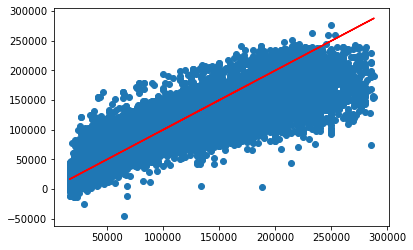

In [64]:
# PREDICTIONS LM1
plm = lm.predict(X_test)
plt.scatter(y_test,plm)
plt.plot(y_test,y_test,"r")

In [65]:
# EVALUATE THE MODEL LM1
print("MSE:",metrics.mean_squared_error (y_test,plm))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,plm)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,plm))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, plm))
print("RMAE:", metrics.mean_absolute_error (y_test, plm)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,plm))

MSE: 337749833.53356075
RMSE: 18377.971420523016
RRMSE: 0.17251520456969116
MAE: 12532.872426256441
RMAE: 0.11764688283533854
EV: 0.7423319382879393


In [66]:
#RANDOM FOREST Regressor: RFR1
model = pd.read_csv("model.csv")
model = model.dropna()
model = model.drop(['CASE_STATUS',
'DAYS_TO_DECIDE',
'YEAR',
'WO-PW',
'DISC_UNIT',
'YRSPOSTGRAD',"YR","MTH","HR","WK","YOUNG","OLD"], axis = 1)

X = model.drop("WO_A",axis = 1)
y = model["WO_A"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# RANDOM FOREST 1: RF1
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)

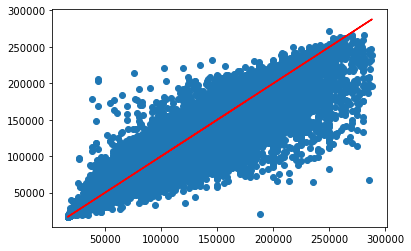

In [67]:
# PREDICTIONS RFR1
plt.scatter(y_test,p2)
plt.plot(y_test,y_test,"r")

In [68]:
# EVALUATE THE MODEL RFR1
print("MSE:",metrics.mean_squared_error (y_test,p2))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,p2)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,p2))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, p2))
print("RMAE:", metrics.mean_absolute_error (y_test, p2)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,p2))

MSE: 170696262.6801015
RMSE: 13065.07798216687
RRMSE: 0.12264273075838428
MAE: 7232.227646071667
RMAE: 0.06788938796930191
EV: 0.8698762785399397


In [69]:
##### DEEP LEARNING CLASSIFICATION ####

In [70]:
# Preprocessing Data
model = pd.read_csv("model.csv")
model = model.dropna()
X = model.drop("CASE_STATUS",axis = 1)
y = model["CASE_STATUS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating Model: dm2
dm2 = Sequential()

dm2.add(Dense(207,activation = "relu"))
dm2.add(Dropout(.2))
dm2.add(Dense(105,activation = "relu"))
dm2.add(Dropout(.2))
dm2.add(Dense(1,activation = "sigmoid"))

dm2.compile(optimizer = "adam", loss = "binary_crossentropy", )
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 10)


# Training DLM1
dm2.fit(x = X_train, y = y_train, epochs = 500,validation_data = (X_test,y_test), callbacks = [early_stop], batch_size = 32)

Epoch 1/500
13750/13750 [==============================] - 39s 3ms/step - loss: 0.2204 - val_loss: 0.2131
Epoch 2/500
13750/13750 [==============================] - 36s 3ms/step - loss: 0.2134 - val_loss: 0.2106
Epoch 3/500
13750/13750 [==============================] - 38s 3ms/step - loss: 0.2108 - val_loss: 0.2089
Epoch 4/500
13750/13750 [==============================] - 41s 3ms/step - loss: 0.2081 - val_loss: 0.2084
Epoch 5/500
13750/13750 [==============================] - 37s 3ms/step - loss: 0.2058 - val_loss: 0.2072
Epoch 6/500
13750/13750 [==============================] - 37s 3ms/step - loss: 0.2038 - val_loss: 0.2047
Epoch 7/500
13750/13750 [==============================] - 37s 3ms/step - loss: 0.2023 - val_loss: 0.2032
Epoch 8/500
13750/13750 [==============================] - 38s 3ms/step - loss: 0.2016 - val_loss: 0.2023
Epoch 9/500
13750/13750 [==============================] - 38s 3ms/step - loss: 0.2007 - val_loss: 0.2016
Epoch 10/500
13750/13750 [====================

<AxesSubplot:>

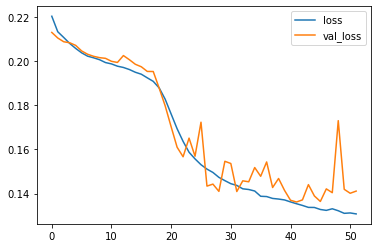

In [71]:
# Overfitting?
pd.DataFrame(dm2.history.history).plot()

In [72]:
# Evaluating DLM1
pdm2 = (dm2.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, pdm2))
print(confusion_matrix(y_test, pdm2))

4584/4584 [==============================] - 6s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.48      0.62      9878
           1       0.96      1.00      0.98    136785

    accuracy                           0.96    146663
   macro avg       0.93      0.74      0.80    146663
weighted avg       0.96      0.96      0.96    146663

[[  4698   5180]
 [   520 136265]]


In [73]:
##### ML Classification Models ####

In [74]:
### RANDOM FOREST ###

In [75]:
# OVER SAMPLING THE MINORITY (REJECT)
model = pd.read_csv("model.csv")
model = model.dropna()
X = model.drop("CASE_STATUS",axis = 1)
y = model["CASE_STATUS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

X = pd.concat([X_train, y_train], axis=1)
reject = X[X["CASE_STATUS"]==0]
accept = X[X["CASE_STATUS"]==1]

reject_o = resample(reject,replace=True,n_samples=len(accept),random_state=0)
new = pd.concat([accept, reject_o])

# RETEST
y_train = new["CASE_STATUS"]
X_train = new.drop("CASE_STATUS", axis=1)
rfco = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
predo = rfco.predict(X_test)
print(confusion_matrix(y_test,predo))
print(classification_report(y_test,predo))

[[  5206   4672]
 [   465 136320]]
              precision    recall  f1-score   support

           0       0.92      0.53      0.67      9878
           1       0.97      1.00      0.98    136785

    accuracy                           0.96    146663
   macro avg       0.94      0.76      0.83    146663
weighted avg       0.96      0.96      0.96    146663



In [76]:
# UNDER SAMPLING THE MAJORITY (ACCEPT)
model = pd.read_csv("model.csv")
model = model.dropna()
X = model.drop("CASE_STATUS",axis = 1)
y = model["CASE_STATUS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X = pd.concat([X_train, y_train], axis=1)
reject = X[X["CASE_STATUS"]==0]
accept = X[X["CASE_STATUS"]==1]

accept_u = resample(accept, replace = False, n_samples = len(reject), random_state = 0) 
new = pd.concat([accept_u, reject])

# RETEST
y_train = new["CASE_STATUS"]
X_train = new.drop("CASE_STATUS", axis=1)
rfcu = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
predu = rfcu.predict(X_test)
print(confusion_matrix(y_test,predu))
print(classification_report(y_test,predu))

[[  8095   1783]
 [ 16853 119932]]
              precision    recall  f1-score   support

           0       0.32      0.82      0.46      9878
           1       0.99      0.88      0.93    136785

    accuracy                           0.87    146663
   macro avg       0.65      0.85      0.70    146663
weighted avg       0.94      0.87      0.90    146663



In [77]:
# SMOTE
model = pd.read_csv("model.csv")
model = model.dropna()
X = model.drop("CASE_STATUS",axis = 1)
y = model["CASE_STATUS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
smote = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)

pred = smote.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  5349   4529]
 [   717 136068]]
              precision    recall  f1-score   support

           0       0.88      0.54      0.67      9878
           1       0.97      0.99      0.98    136785

    accuracy                           0.96    146663
   macro avg       0.92      0.77      0.83    146663
weighted avg       0.96      0.96      0.96    146663



In [78]:
#RANDOM FOREST 
model = pd.read_csv("model.csv")
model = model.dropna()
X = model.drop("CASE_STATUS",axis = 1)
y = model["CASE_STATUS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# RANDOM FOREST 1: RF1
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train,y_train)
prf = rf.predict(X_test)
print(confusion_matrix(y_test,prf))
print(classification_report(y_test,prf))

[[  5012   4866]
 [   245 136540]]
              precision    recall  f1-score   support

           0       0.95      0.51      0.66      9878
           1       0.97      1.00      0.98    136785

    accuracy                           0.97    146663
   macro avg       0.96      0.75      0.82    146663
weighted avg       0.96      0.97      0.96    146663



In [79]:
#gbc=HistGradientBoostingClassifier(learning_rate=0.01, 
#        max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
#        n_iter_no_change=15, random_state=0).fit(X_train,y_train)
#
#predtst=gbc.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = metrics.roc_curve(y_test, predtst)
#dfplot=pd.DataFrame({'Threshold':thresholds, 
#        'False Positive Rate':fpr, 
#        'False Negative Rate': 1.-tpr})

In [80]:
#ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
#        'False Negative Rate'], figsize=(10,6))
#ax.plot([0.75,0.1],[0,0.1]) #mark example thresh.
#ax.set_xbound(0.905,.907); ax.set_ybound(.31,0.38) #zoom in

In [81]:
#threshtest = np.where(predtst >= 0.90625, 1, 0)
#print(confusion_matrix(y_test,threshtest))
#print(classification_report(y_test,threshtest))

In [82]:
# GridSearch CV for RFC
#model = pd.read_csv("model.csv")
#model = model.dropna()
#X = model.drop("CASE_STATUS",axis = 1)
#y = model["CASE_STATUS"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

#rfc = RandomForestClassifier(random_state = 0)
#parameters = {"n_estimators":[10,50,100,200],"max_depth":[2,4,8,10],"max_features": ['sqrt', 'log2'],
#    "criterion" :['gini', 'entropy']}

#cv = GridSearchCV(rfc,parameters,cv=5)
#cv.fit(X_train,y_train)
#cv.best_params_

In [83]:
#RANDOM FOREST 
#model = pd.read_csv("model.csv")
#model = model.dropna()
#X = model.drop("CASE_STATUS",axis = 1)
#y = model["CASE_STATUS"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# RANDOM FOREST 1: RF1
#rfcv = RandomForestClassifier(n_estimators = 50, random_state = 0, criterion="gini",max_depth = 10, max_features= "sqrt")
#rfcv.fit(X_train,y_train)
#prfcv = rfcv.predict(X_test)
#print(confusion_matrix(y_test,prfcv))
#print(classification_report(y_test,prfcv))